In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
songs= pd.read_csv("songs.csv")
songs_info= pd.read_csv("song_extra_info.csv")
users= pd.read_csv("members.csv")
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [4]:
print("songs:", songs.shape)
print("songs_info:", songs_info.shape)
print("users:", users.shape)
print("train:", train.shape)
print("test:", test.shape)

songs: (2296320, 7)
songs_info: (1048575, 3)
users: (34403, 7)
train: (7377418, 6)
test: (2556790, 6)


In [5]:
train = train.merge(songs, on='song_id', how='left')
train = train.merge(users, on='msno', how='left')
train = train.merge(songs_info, on='song_id', how='left')

In [6]:
test = test.merge(songs, on='song_id', how='left')
test = test.merge(users, on='msno', how='left')
test = test.merge(songs_info, on='song_id', how='left')

Train data Analysis

In [7]:
train.shape

(7377418, 20)

In [8]:
train.duplicated().sum()

0

In [9]:
train.isnull().sum().sum()

11480913

In [10]:
train.dropna(inplace=True)

In [11]:
train.isnull().sum().sum()

0

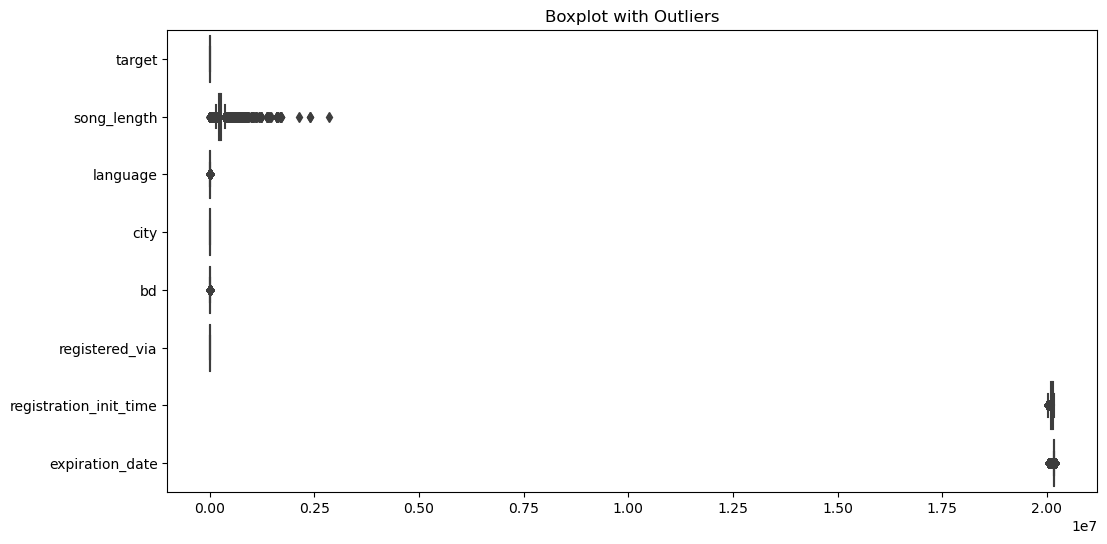

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train, orient ='h')
plt.title('Boxplot with Outliers')
plt.show();

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for column in train.columns:
    if pd.api.types.is_numeric_dtype(train[column]):
        lower_range,upper_range = remove_outlier(train[column])
        train[column]= np.where(train[column]>upper_range, upper_range , train[column])
        train[column]= np.where(train[column]<lower_range, lower_range ,train[column])

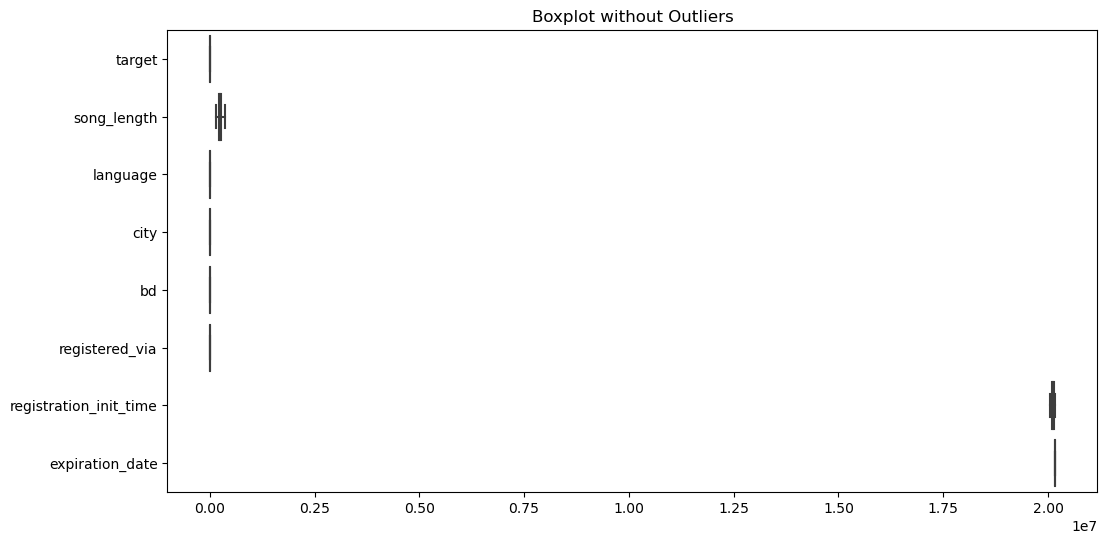

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train, orient ='h')
plt.title('Boxplot without Outliers')
plt.show();

In [15]:
train.rename(columns={'msno': 'user_id', 'name': 'song_name', 'bd': 'age'}, inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825700 entries, 11 to 7377401
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  float64
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    float64
 13  age                     float64
 14  gender                  object 
 15  registered_via          float64
 16  registration_init_time  float64
 17  expiration_date         float64
 18  song_name               object 
 19  isrc                    object 
dtypes: float64(8), object(12)
memory usage: 292.5+ MB


In [17]:
train['source_system_tab'] = train['source_system_tab'].astype('category')
train['source_screen_name'] = train['source_screen_name'].astype('category')
train['source_type'] = train['source_type'].astype('category')
train['registration_init_time'] = train['registration_init_time'].astype('int64')
train['expiration_date'] = train['expiration_date'].astype('int64')

In [18]:
train['registration_init_time'] = pd.to_datetime(train['registration_init_time'], format='%Y%m%d',errors='coerce')
train['expiration_date'] = pd.to_datetime(train['expiration_date'], format='%Y%m%d',errors='coerce')
print(train[['registration_init_time', 'expiration_date']].head())

   registration_init_time expiration_date
11             2011-11-07             NaT
19             2013-09-12      2017-09-12
21             2013-09-12      2017-09-12
32             2010-08-12      2017-09-12
38             2015-10-14             NaT


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825700 entries, 11 to 7377401
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   song_id                 object        
 2   source_system_tab       category      
 3   source_screen_name      category      
 4   source_type             category      
 5   target                  float64       
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  city                    float64       
 13  age                     float64       
 14  gender                  object        
 15  registered_via          float64       
 16  registration_init_time  datetime64[ns]
 17  expiration_date         datetime64[ns]
 18  song_n

In [20]:
song_id_mapping = {song_id: idx + 1 for idx, song_id in enumerate(train['song_id'].unique())}
train['song_id_new'] = train['song_id'].map(song_id_mapping)
train = train.drop(columns=['song_id'])
train.head(2)

,user_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc,song_id_new
11,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,my library,Local playlist more,local-library,1.0,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,3.0,15.0,26.0,male,9.0,2011-11-07,NaT,輕輕 (Lightly),TWK231507907,1
19,uQQHTQJ1nVEkBfbXe0f1/J9ML5eQhsQiocCV5TvvCRI=,my library,Local playlist more,local-library,1.0,241975.0,465,孫燕姿 (Yanzi Sun),Li Wei Song,Xiao Han,3.0,9.0,27.0,female,9.0,2013-09-12,2017-09-12,雨天 (雨天),TWA530617601,2


In [21]:
user_id_mapping = {user_id: f"user_id{idx + 1}" for idx, user_id in enumerate(train['user_id'].unique())}
train['user_id_new'] = train['user_id'].map(user_id_mapping)
train = train.drop(columns=['user_id'])
train.head(2)

,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc,song_id_new,user_id_new
11,my library,Local playlist more,local-library,1.0,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,3.0,15.0,26.0,male,9.0,2011-11-07,NaT,輕輕 (Lightly),TWK231507907,1,user_id1
19,my library,Local playlist more,local-library,1.0,241975.0,465,孫燕姿 (Yanzi Sun),Li Wei Song,Xiao Han,3.0,9.0,27.0,female,9.0,2013-09-12,2017-09-12,雨天 (雨天),TWA530617601,2,user_id2


In [22]:
train.columns

Index(['source_system_tab', 'source_screen_name', 'source_type', 'target',
       'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'language', 'city', 'age', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_name', 'isrc',
       'song_id_new', 'user_id_new'],
      dtype='object')

In [23]:
train = train[['song_id_new', 'user_id_new'] + [col for col in train.columns if col not in ['song_id_new', 'user_id_new']]]
train = train[[col for col in train.columns if col != 'target'] + ['target']]

In [24]:
train.head(2)

,song_id_new,user_id_new,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc,target
11,1,user_id1,my library,Local playlist more,local-library,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,3.0,15.0,26.0,male,9.0,2011-11-07,NaT,輕輕 (Lightly),TWK231507907,1.0
19,2,user_id2,my library,Local playlist more,local-library,241975.0,465,孫燕姿 (Yanzi Sun),Li Wei Song,Xiao Han,3.0,9.0,27.0,female,9.0,2013-09-12,2017-09-12,雨天 (雨天),TWA530617601,1.0


In [25]:
train.shape

(1825700, 20)

#### Target Variable Distribution

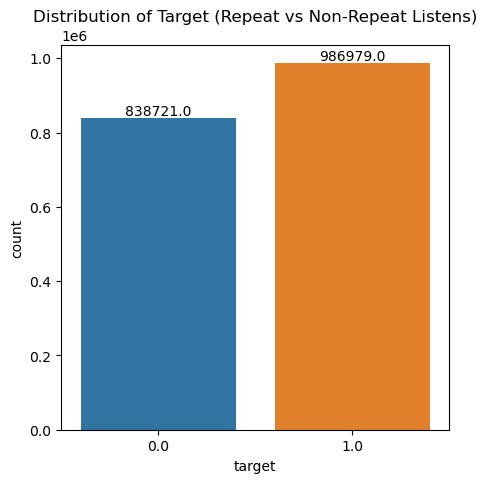

In [26]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x='target', data=train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('Distribution of Target (Repeat vs Non-Repeat Listens)')
plt.show();

#### Categorical Feature Analysis

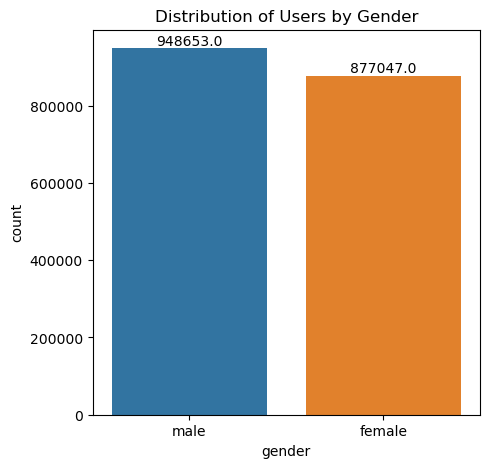

In [27]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='gender', data=train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('Distribution of Users by Gender')
plt.show();

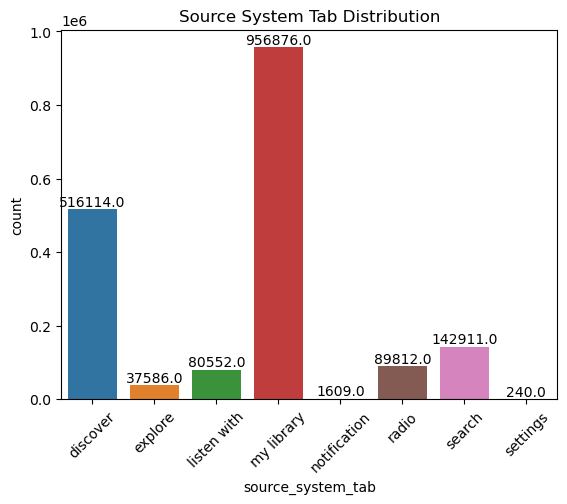

In [28]:
# Source system tab distribution
ax=sns.countplot(x='source_system_tab', data=train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('Source System Tab Distribution')
plt.xticks(rotation=45)
plt.show();

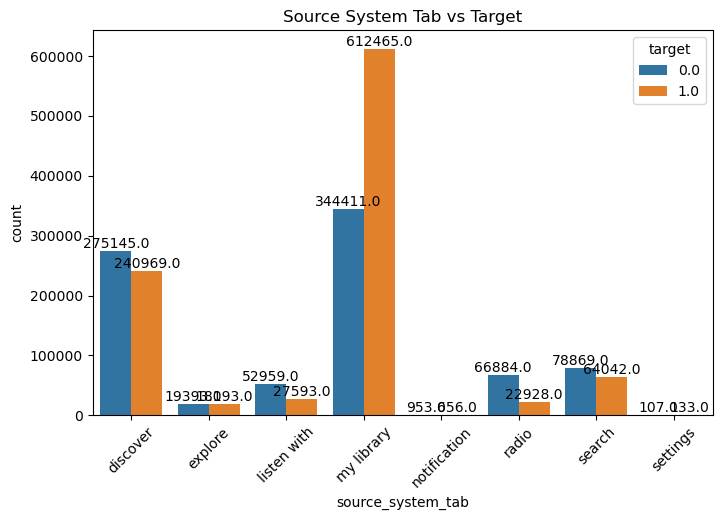

In [29]:
# Cross-tab analysis for source system vs target
plt.figure(figsize=(8,5))
ax= sns.countplot(x='source_system_tab', hue='target', data=train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('Source System Tab vs Target')
plt.xticks(rotation=45)
plt.show();

#### Numerical Feature Analysis

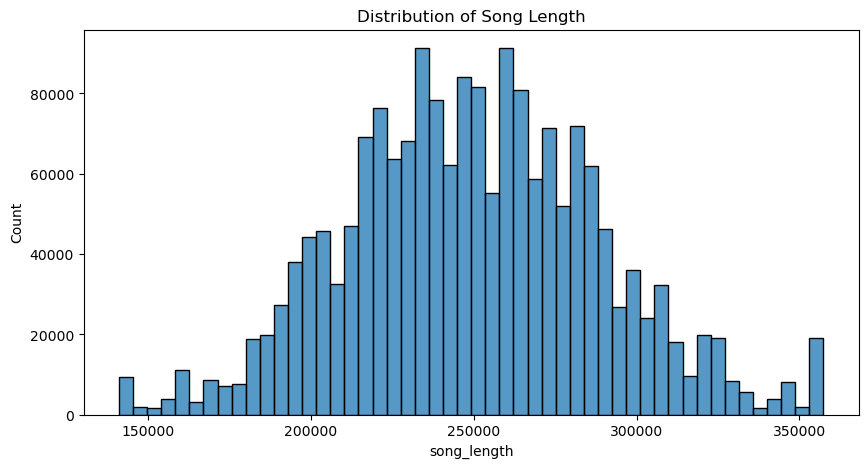

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(train['song_length'], bins=50)
plt.title('Distribution of Song Length')
plt.show();

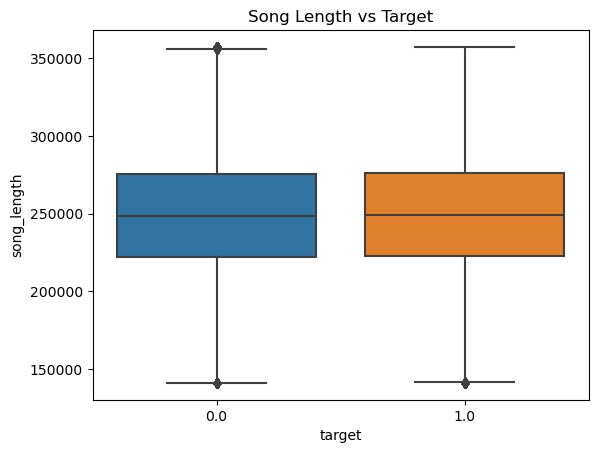

In [31]:
# Song length vs target
sns.boxplot(x='target', y='song_length', data=train)
plt.title('Song Length vs Target')
plt.show();

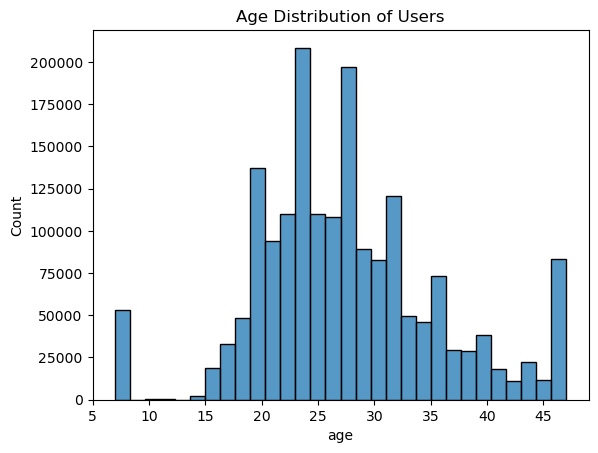

In [32]:
# Age distribution
sns.histplot(train['age'], bins=30)
plt.title('Age Distribution of Users')
plt.show();

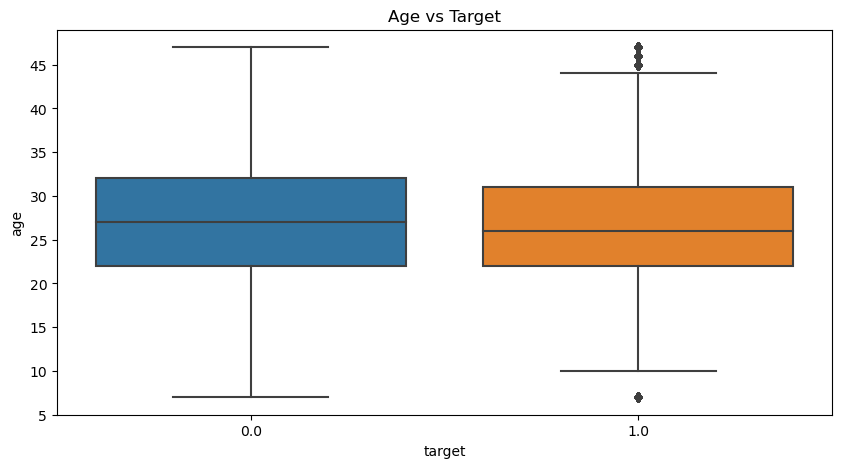

In [33]:
# Age vs target
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='age', data=train)
plt.title('Age vs Target')
plt.show();

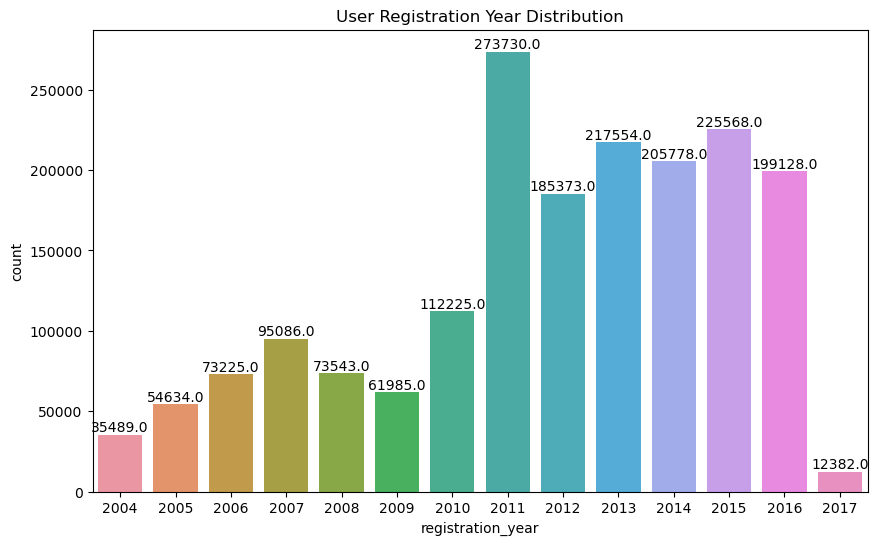

In [34]:
# Extract year and month from registration_init_time
train['registration_year'] = train['registration_init_time'].dt.year
train['registration_month'] = train['registration_init_time'].dt.month

# Plot registration year distribution
plt.figure(figsize=(10,6))
ax= sns.countplot(x='registration_year', data=train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('User Registration Year Distribution')
plt.show();

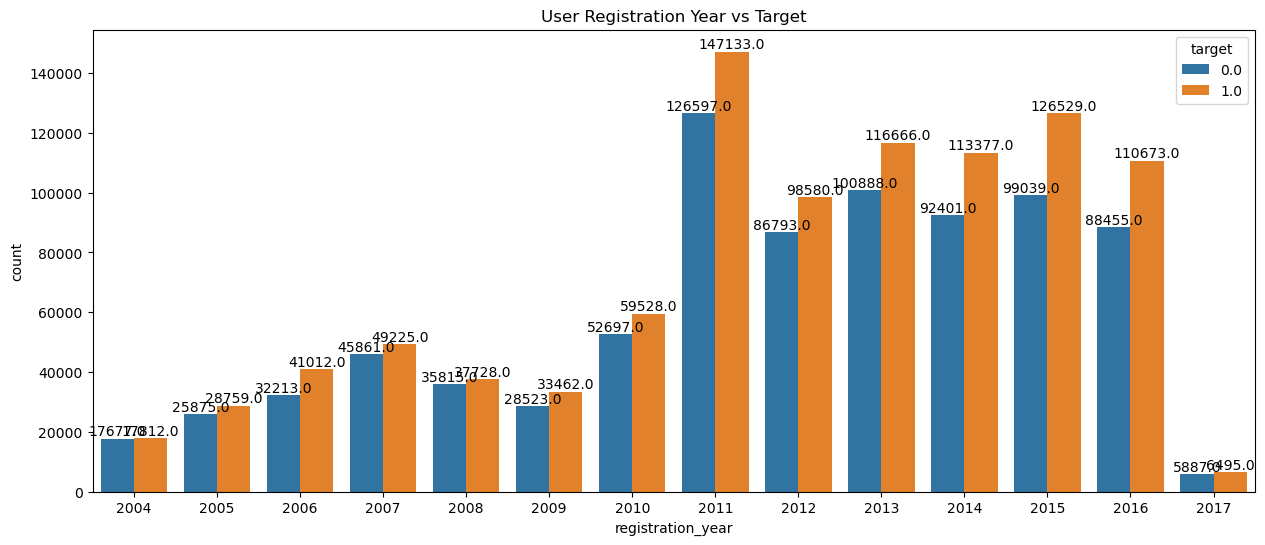

In [35]:
# Registration year vs target
plt.figure(figsize=(15,6))
ax= sns.countplot(x='registration_year', hue='target', data=train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('User Registration Year vs Target')
plt.show();

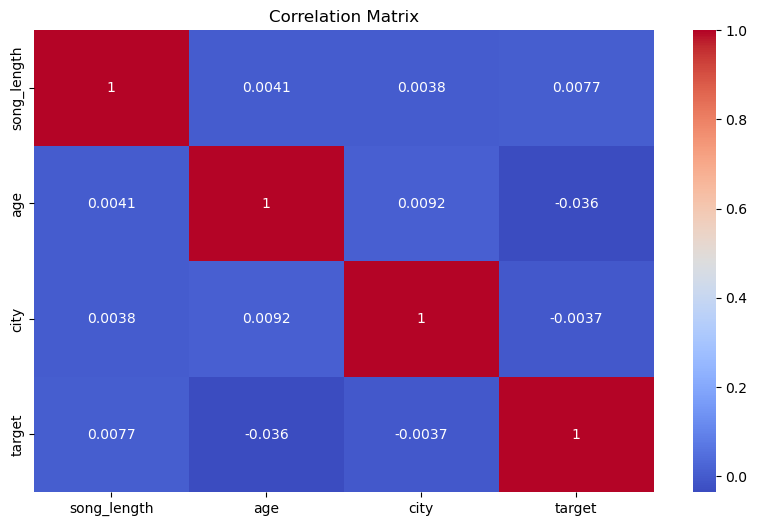

In [36]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(train[['song_length', 'age', 'city', 'target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

In [37]:
genre_target = train.groupby('genre_ids')['target'].mean().sort_values(ascending=False)

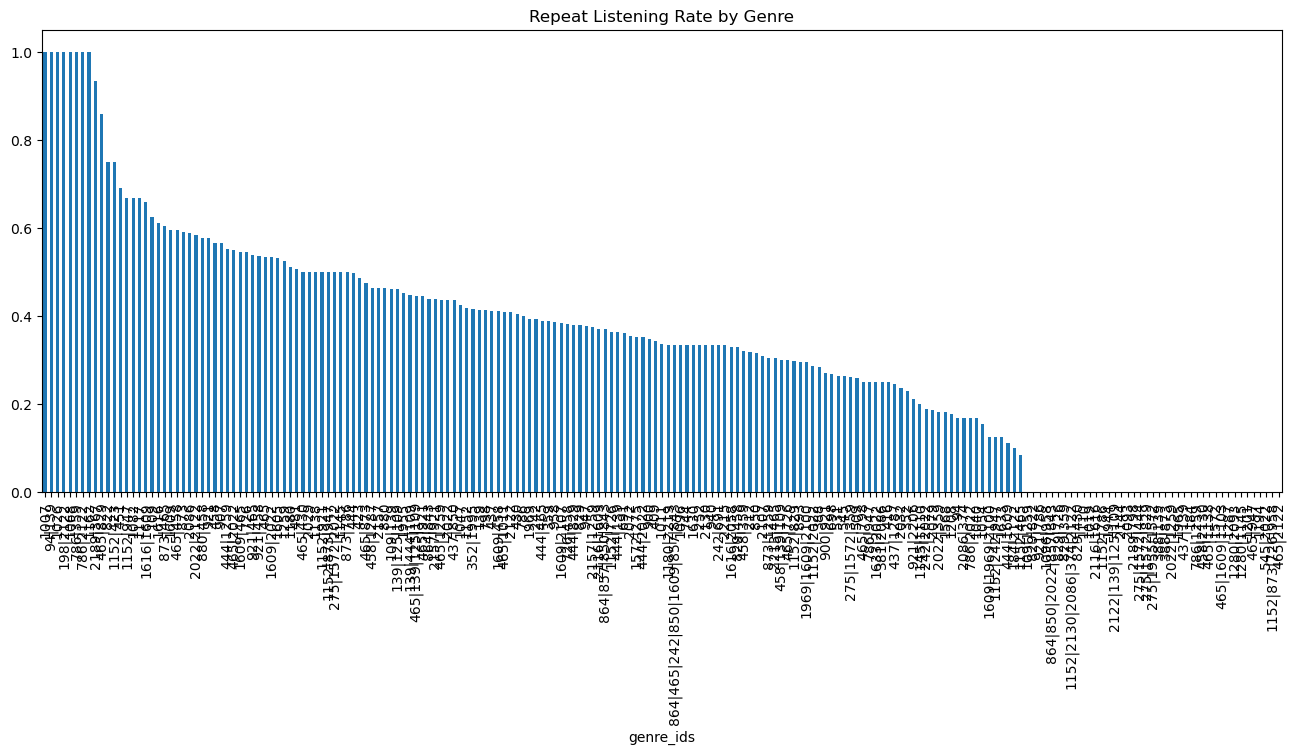

In [38]:
# Plot the result
genre_target.plot(kind='bar', figsize=(16, 6))
plt.title('Repeat Listening Rate by Genre')
plt.show();

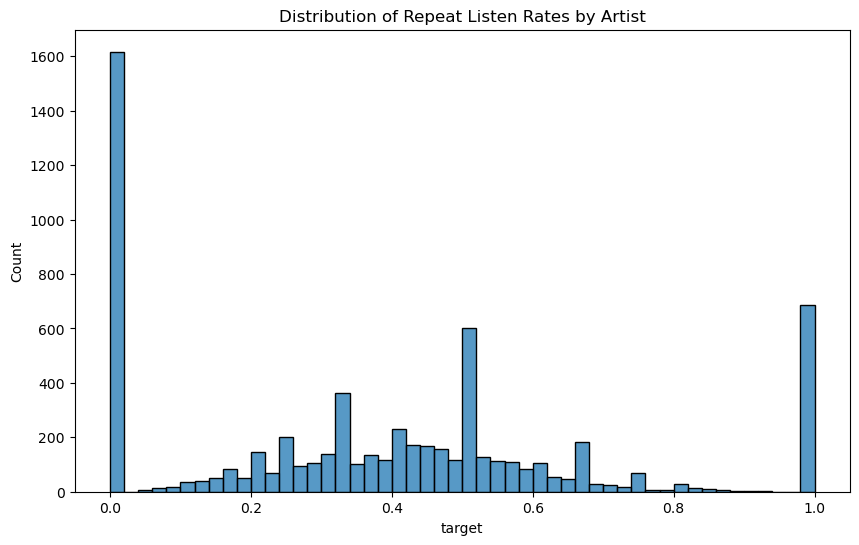

In [39]:
# Plot distribution of repeat listen rates
plt.figure(figsize=(10, 6))
sns.histplot(train.groupby('artist_name')['target'].mean(), bins=50)
plt.title('Distribution of Repeat Listen Rates by Artist')
plt.show();

C:\Users\honey\anaconda_new\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\honey\anaconda_new\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\honey\anaconda_new\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\honey\anaconda_new\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\honey\anaconda_new\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.prin

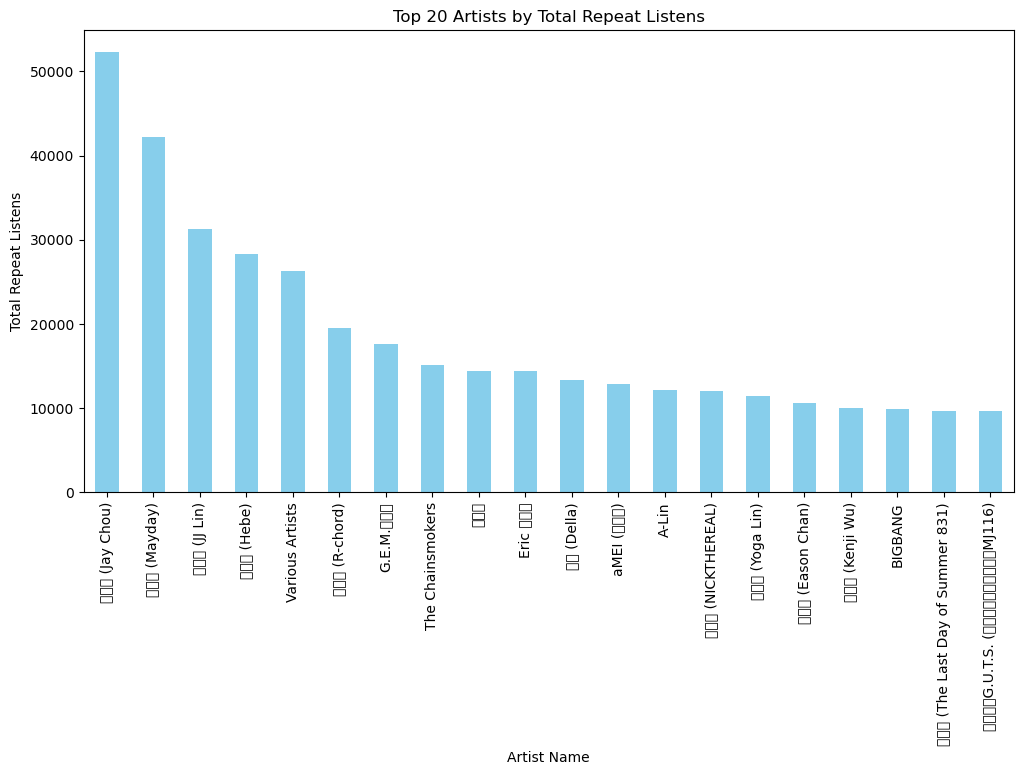

In [40]:
# Total number of repeat listens by artist
artist_target = train.groupby('artist_name')['target'].sum().sort_values(ascending=False).head(20)

# Plot the result
plt.figure(figsize=(12, 6))
artist_target.plot(kind='bar', color='skyblue')
plt.title('Top 20 Artists by Total Repeat Listens')
plt.xlabel('Artist Name')
plt.ylabel('Total Repeat Listens')
plt.xticks(rotation=90)
plt.show();

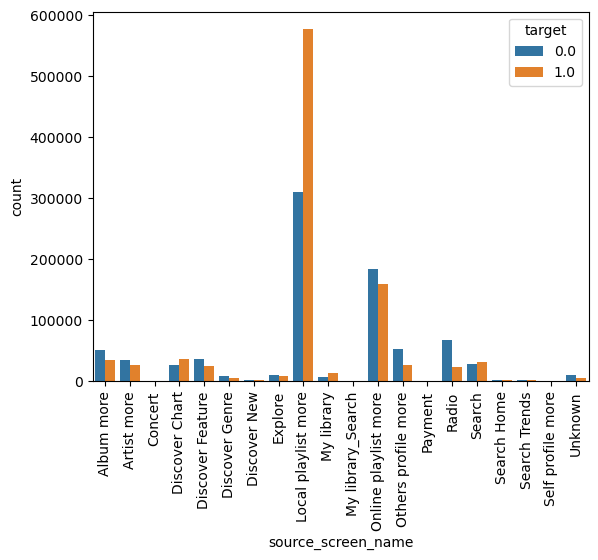

In [41]:
sns.countplot(x='source_screen_name', hue='target', data=train, orient='v')
plt.xticks(rotation=90)
plt.show();

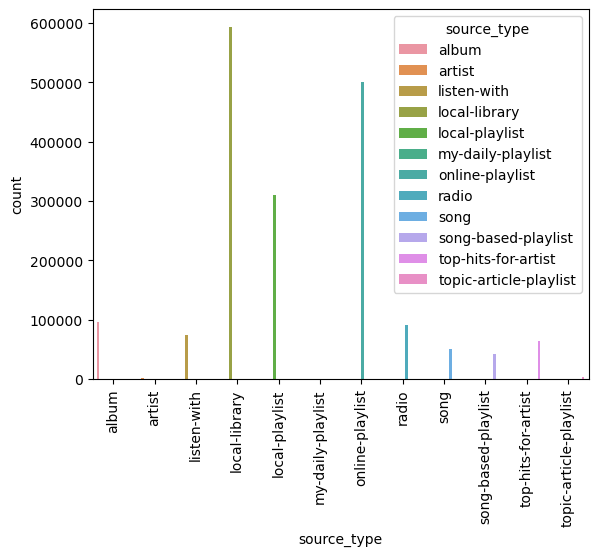

In [42]:
sns.countplot(x='source_type',hue='source_type', data=train, orient= 'v')
plt.xticks(rotation=90)
plt.show();

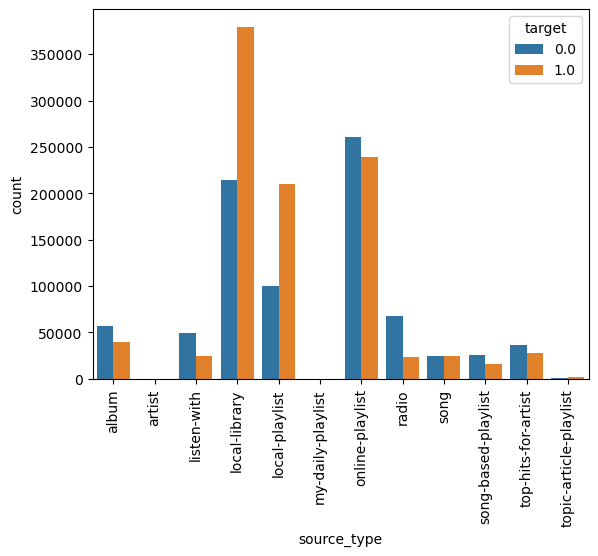

In [43]:
sns.countplot(x = train['source_type'],hue=train['target'],data =train,orient='v')
plt.xticks(rotation =90)
plt.show();

<Axes: xlabel='language', ylabel='count'>

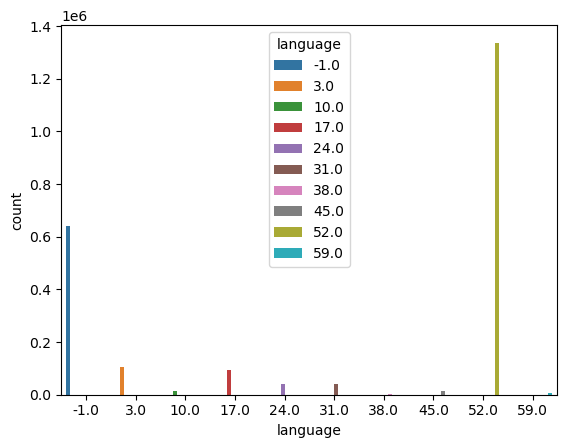

In [44]:
sns.countplot(x = songs['language'],data =train ,hue=songs['language'],orient='v')

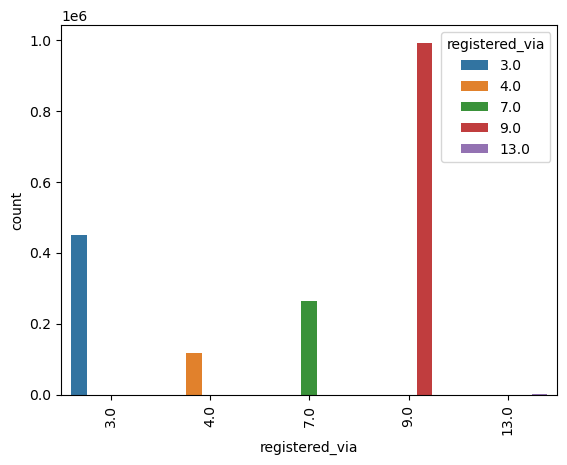

In [45]:
sns.countplot(x = train['registered_via'],hue=train['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show();

In [46]:
pd.set_option('display.max_columns', None)
train.head(2)

,song_id_new,user_id_new,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc,target,registration_year,registration_month
11,1,user_id1,my library,Local playlist more,local-library,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,3.0,15.0,26.0,male,9.0,2011-11-07,NaT,輕輕 (Lightly),TWK231507907,1.0,2011,11
19,2,user_id2,my library,Local playlist more,local-library,241975.0,465,孫燕姿 (Yanzi Sun),Li Wei Song,Xiao Han,3.0,9.0,27.0,female,9.0,2013-09-12,2017-09-12,雨天 (雨天),TWA530617601,1.0,2013,9


train data is now ready to be trained for models.

In [47]:
train.to_csv('train_data.csv', index=False)